# Get data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-01-22 02:23:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2025-01-22 02:23:11 (71.1 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-01-22 02:23:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-01-22 02:23:12 (106 MB/s) - ‘helper_functions.py’ saved [10246/10246]



#Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=['Date'], index_col = ['Date'])
data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
len(data),data.describe(),

(2787,
        Closing Price (USD)  24h Open (USD)  24h High (USD)  24h Low (USD)
 count          2787.000000     2787.000000     2787.000000    2787.000000
 mean           6529.845141     6513.579485     6710.061683    6302.417386
 std           10887.847444    10863.800772    11206.779756   10475.811252
 min             108.584830      108.584830      118.675000      83.328330
 25%             460.087500      459.400500      469.720995     450.818830
 50%            2780.182500     2772.367500     2874.696250    2696.457500
 75%            8506.923720     8496.887593     8763.291985    8221.060570
 max           63346.789035    63562.673545    64801.787870   62094.632914)

In [ ]:
data = data.rename(columns = {'Closing Price (USD)': 'Price'})
df = pd.DataFrame(data['Price'])
df

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


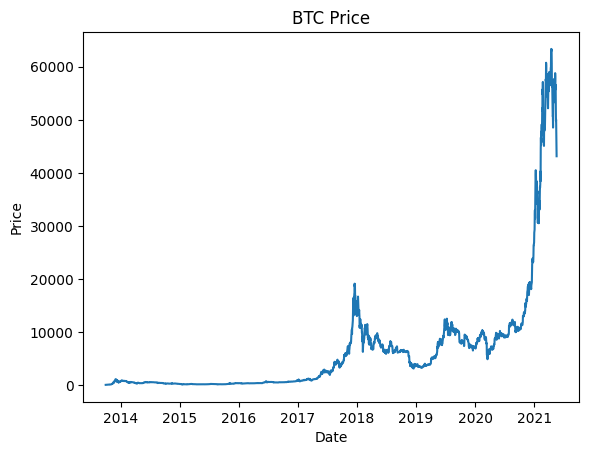

In [ ]:
plt.plot(df)
plt.ylabel("Price")
plt.xlabel("Date")
plt.title("BTC Price")
plt.show()

## Import datetime and csv


In [ ]:
import csv
from datetime import datetime

timesteps = []
btc = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as csvfile:
  reader = csv.reader(csvfile, delimiter = ',')
  next(reader)
  for line in reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc.append(float(line[2]))


In [ ]:
timesteps[:10], btc[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'BTC Price')

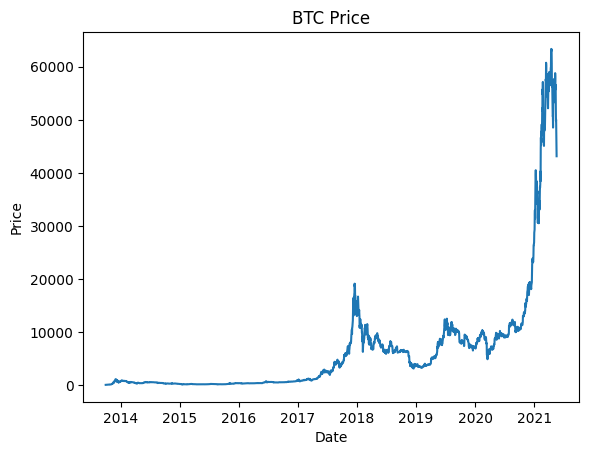

In [ ]:
plt.plot(timesteps, btc)
plt.ylabel("Price")
plt.xlabel("Date")
plt.title("BTC Price")

# Create test train splits

In [ ]:
split_size = int(0.8*len(df))

X_train, Y_train = df.index.to_numpy()[:split_size], df['Price'].to_numpy()[:split_size]
X_test, Y_test = df.index.to_numpy()[split_size:], df['Price'].to_numpy()[split_size:]

Text(0.5, 1.0, 'BTC Price')

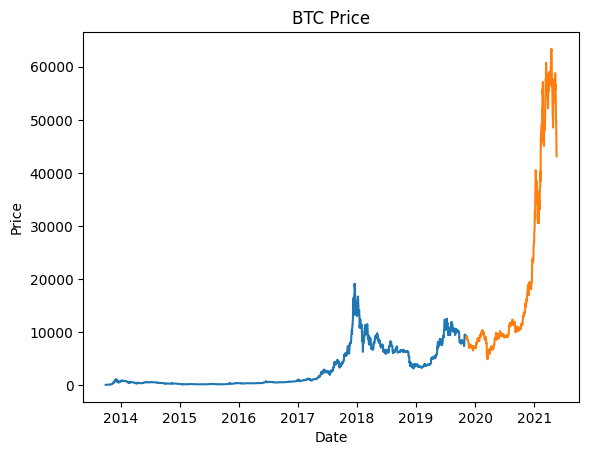

In [ ]:
plt.plot(X_train, Y_train)
plt.plot(X_test, Y_test)
plt.ylabel("Price")
plt.xlabel("Date")
plt.title("BTC Price")

In [ ]:
def plot_time_series(timesteps, values, format="-", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")

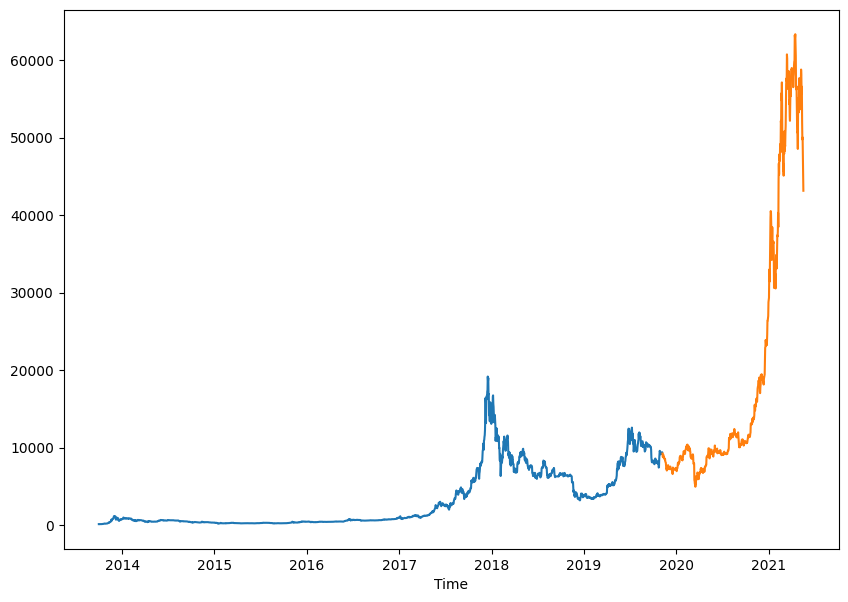

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(X_train, Y_train)
plot_time_series(X_test, Y_test)

# Making baseline model (naive forecast)


In [ ]:
import sklearn

In [ ]:
naive_forecast = Y_test[:-1]

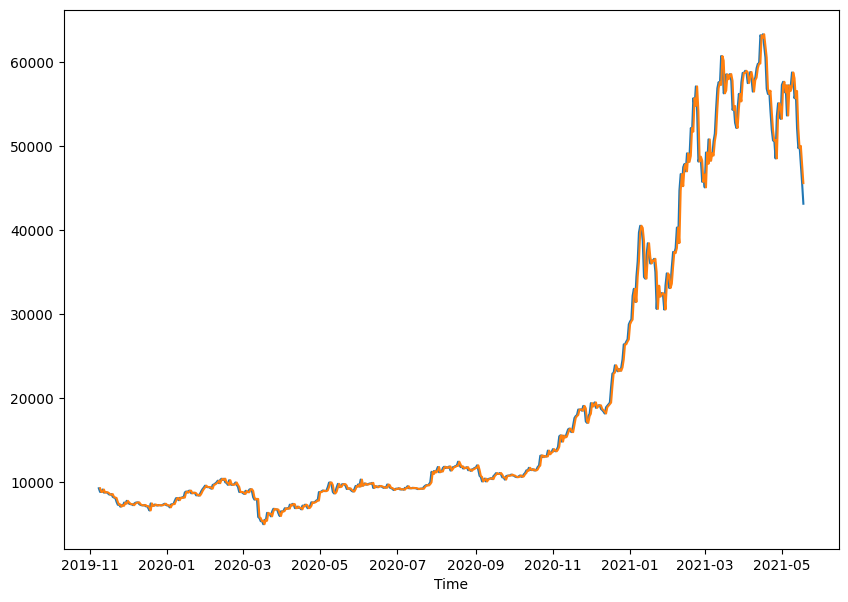

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(X_test, Y_test)
plot_time_series(X_test[1:], naive_forecast)
#

# Metrics for time series forecasting:

* MAE
* MSE
* RMSE
* MASE
* MAPE

## Implementing MASE using tensorflow

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implementation of MASE
  """

  mae =tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return (mae/mae_naive_no_season).numpy()

In [ ]:
mean_absolute_scaled_error(Y_test[1:], naive_forecast)

0.9995699939182624

## Create evaluate preds

In [ ]:
def evaluate_preds(y_true, y_pred):
  """
  Prints MAE, MSE, RMSE and MASE
  """

  #Make sure its in float 32
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(y_true, y_pred)

  mse = tf.keras.metrics.MeanSquaredError()
  mse.update_state(y_true, y_pred)

  mape = tf.keras.metrics.MeanAbsolutePercentageError()
  mape.update_state(y_true, y_pred)

  rmse = tf.sqrt(mse.result())

  if mae.result().ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    mape = tf.reduce_mean(mape)
    rmse = tf.reduce_mean(rmse)

  return pd.DataFrame({"MAE": mae.result().numpy(),
                      "MSE": mse.result().numpy(),
                      "RMSE": rmse.numpy(),
                      "MASE": mean_absolute_scaled_error(y_true, y_pred),
                      "MAPE": mape.result().numpy()}, index = [0])

In [ ]:
base_results =evaluate_preds(Y_test[1:], naive_forecast)

#Windowing dataset

* To turn this into a supervised learning problem

In [ ]:
import numpy as np

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_window(x, horizon = HORIZON):
  """
  Create labels for windowed dataset
  """

  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
def make_window(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  """
  Turns 1D array into a 2D window
  """

  window_step = np.expand_dims(np.arange(window_size+horizon), axis = 0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis = 0).T

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_window(windowed_array, horizon)

  return windows, labels

In [ ]:
full_window, full_labels = make_window(df['Price'].to_numpy())
len(full_window), len(full_labels)

(2780, 2780)

In [ ]:
full_window[:3], full_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116]]))

In [ ]:
def make_train_test_split(windows, labels, split_size = split_size):
  split_size = int(len(windows)*(1-split_size))
  return windows[:split_size], windows[split_size:], labels[:split_size], labels[split_size:]

NameError: name 'split_size' is not defined

In [ ]:
X_train_full, X_test_full, Y_train_full, Y_test_full = make_train_test_split(full_window, full_labels,0.2)
len(X_train_full), len(X_test_full), len(Y_train_full), len(Y_test_full)

(2224, 556, 2224, 556)

In [ ]:
X_train_full.shape, X_test_full.shape, Y_train_full.shape, Y_test_full.shape

((2224, 7), (556, 7), (2224, 1), (556, 1))

# Make a modelling checkpoint callback function

In [ ]:
import os
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            monitor ='val_loss',
                                            save_best_only = True,
                                            save_weights_only = True)

# Model 1: Dense Model (window = 7, horizon = 1)

In [ ]:
Inputs = tf.keras.layers.Input(shape = (7,))
x = tf.keras.layers.Dense(128, activation = 'relu')(Inputs)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model_1 = tf.keras.Model(Inputs, outputs)

In [ ]:
model_1.compile(loss = tf.keras.losses.MeanSquaredError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

In [ ]:
model_1.fit(X_train_full,
            Y_train_full,
            batch_size = 128,
            epochs = 100,
            validation_data =(X_test_full, Y_test_full),
            callbacks = [create_model_checkpoint("model_1.weights.h5")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 11053279.0000 - mae: 1841.0558 - mse: 11053279.0000 - val_loss: 37164720.0000 - val_mae: 4323.4346 - val_mse: 37164720.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 824904.2500 - mae: 490.2963 - mse: 824904.2500 - val_loss: 8516160.0000 - val_mae: 1953.0774 - val_mse: 8516160.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 233867.6562 - mae: 235.2337 - mse: 233867.6562 - val_loss: 3103699.7500 - val_mae: 969.0028 - val_mse: 3103699.7500
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 152226.9062 - mae: 170.4877 - mse: 152226.9062 - val_loss: 2892426.0000 - val_mae: 970.8236 - val_mse: 2892426.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 138273.2344 - mae: 156.7161 - mse: 138273.2344 - val_loss: 2729119.2500 - val_mae: 936.0100 - val_mse: 2729119.2500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 141834.3438 - mae: 161.5667 - mse: 141834.3438 - val_los

In [ ]:
model_1.evaluate(X_test_full, Y_test_full)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 477294.0000 - mae: 393.5628 - mse: 477294.0000


[1640352.375, 739.528564453125, 1640352.375]

In [ ]:
model_1.load_weights("model_experiments/model_1.weights.h5")
model_1.evaluate(X_test_full, Y_test_full)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 358063.0000 - mae: 293.8646 - mse: 358063.0000


[1204107.0, 581.1732177734375, 1204107.0]

In [ ]:
Y_test_full_preds = model_1.predict(X_test_full)
model_1_results = evaluate_preds(Y_test_full, Y_test_full_preds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


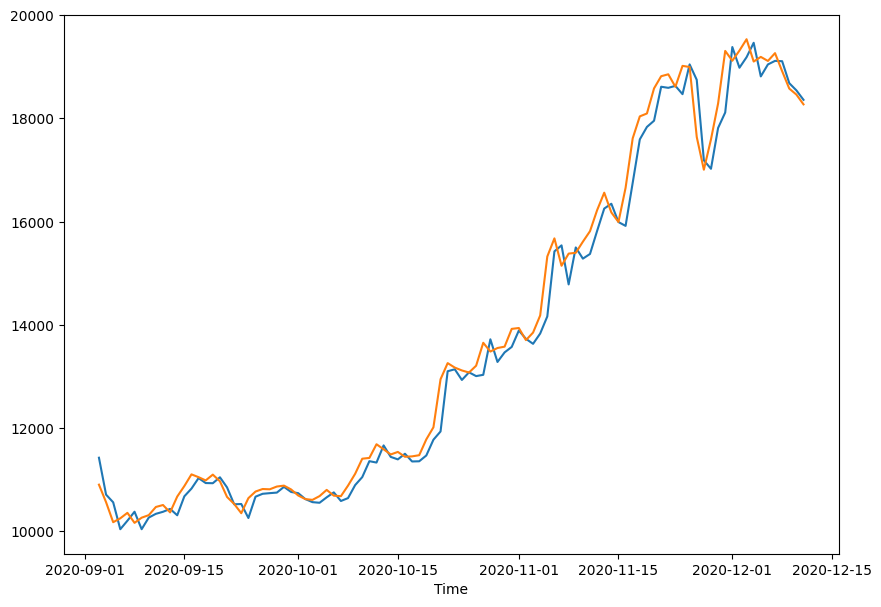

In [ ]:
offset = 300
plt.figure(figsize = (10,7))
plot_time_series(X_test, Y_test, start = offset, end = offset + 100)
plot_time_series(X_test, Y_test_full_preds, start = offset, end = offset + 100)

# Model 2: Dense (window = 30)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
full_window, full_labels = make_window(df['Price'].to_numpy(), WINDOW_SIZE, HORIZON)
len(full_window), len(full_labels)

(2757, 2757)

In [ ]:
len(full_window[0])

30

In [ ]:
X_train_30, X_test_30, Y_train_30, Y_test_30 = make_train_test_split(full_window, full_labels,0.2)
len(X_train_30), len(X_test_30), len(Y_train_30), len(Y_test_30)

(2205, 552, 2205, 552)

In [ ]:
X_train_30.shape, X_test_30.shape, Y_train_30.shape, Y_test_30.shape

((2205, 30), (552, 30), (2205, 1), (552, 1))

In [ ]:
Inputs = tf.keras.layers.Input(shape = (WINDOW_SIZE,))
x = tf.keras.layers.Dense(128, activation = 'relu')(Inputs)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(HORIZON)(x)

model_2 = tf.keras.Model(Inputs, outputs)

In [ ]:
model_2.compile(loss = tf.keras.losses.MeanSquaredError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

In [ ]:
model_2.fit(X_train_30,
            Y_train_30,
            epochs = 100,
            batch_size = 128,
            validation_data = (X_test_30, Y_test_30),
            callbacks = [create_model_checkpoint("model_2.weights.h5")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 5334776.0000 - mae: 1182.3348 - mse: 5334776.0000 - val_loss: 13312023.0000 - val_mae: 2334.2832 - val_mse: 13312023.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 393006.3438 - mae: 306.4604 - mse: 393006.3438 - val_loss: 4624369.0000 - val_mae: 1206.5625 - val_mse: 4624369.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 288167.2812 - mae: 242.6599 - mse: 288167.2812 - val_loss: 4212031.0000 - val_mae: 1161.9540 - val_mse: 4212031.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 238540.3438 - mae: 216.2459 - mse: 238540.3438 - val_loss: 3996238.5000 - val_mae: 1135.8566 - val_mse: 3996238.5000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 198949.5312 - mae: 192.4532 - mse: 198949.5312 - val_loss: 4407993.5000 - val_mae: 1275.2972 - val_mse: 4407993.5000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 199597.8281 - mae: 194.6826 - mse: 199597.8281 - v

In [ ]:
model_2.evaluate(X_test_30, Y_test_30)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 769006.8125 - mae: 556.1743 - mse: 769006.8125


[2447338.75, 998.1455078125, 2447338.75]

In [ ]:
model_2.load_weights("model_experiments/model_2.weights.h5")
model_2.evaluate(X_test_30, Y_test_30)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 384254.1562 - mae: 320.6171 - mse: 384254.1562


[1283308.375, 629.7711181640625, 1283308.375]

In [ ]:
model_2_preds = model_2.predict(X_test_30)
model_2_results = evaluate_preds(Y_test_30, model_2_preds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


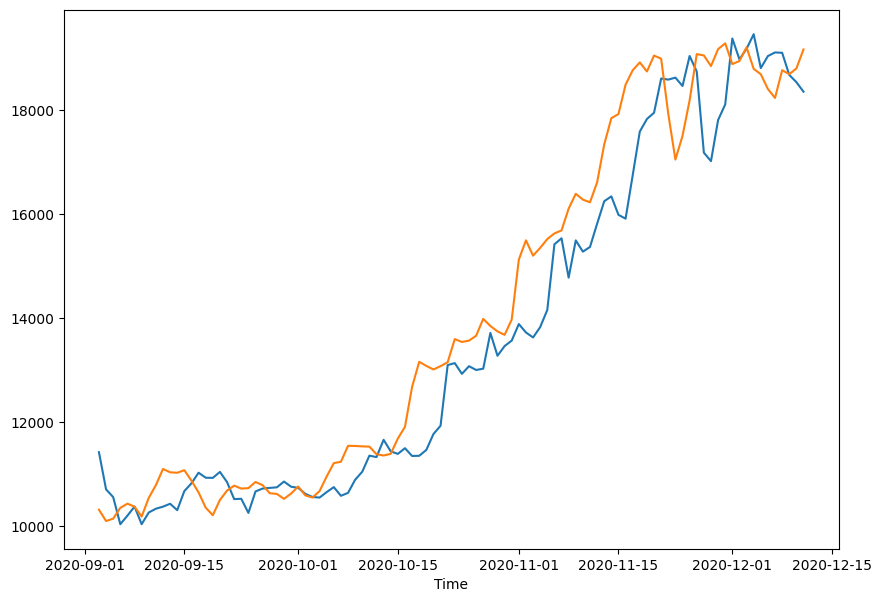

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(X_test, Y_test, start = offset, end = offset + 100)
plot_time_series(X_test, model_2_preds, start = offset, end = offset + 100)

# Model 3: Horizon 7

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
full_window, full_labels = make_window(df['Price'].to_numpy(), WINDOW_SIZE, HORIZON)
len(full_window), len(full_labels)

(2751, 2751)

In [ ]:
X_train_30_7, X_test_30_7, Y_train_30_7, Y_test_30_7 = make_train_test_split(full_window, full_labels,0.2)
len(X_train_30_7), len(X_test_30_7), len(Y_train_30_7), len(Y_test_30_7)

(2200, 551, 2200, 551)

In [ ]:
X_train_30_7.shape, X_test_30_7.shape, Y_train_30_7.shape, Y_test_30_7.shape

((2200, 30), (551, 30), (2200, 7), (551, 7))

In [ ]:
Inputs = tf.keras.layers.Input(shape = (WINDOW_SIZE,))
x = tf.keras.layers.Dense(128, activation = 'relu')(Inputs)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(HORIZON)(x)

model_3 = tf.keras.Model(Inputs, outputs)

In [ ]:
model_3.compile(loss = tf.keras.losses.MeanSquaredError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae', 'mse'])

In [ ]:
model_3.fit(X_train_30_7,
            Y_train_30_7,
            epochs = 100,
            batch_size = 128,
            validation_data = (X_test_30_7, Y_test_30_7),
            callbacks = [create_model_checkpoint("model_3.weights.h5")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 12749039.0000 - mae: 1805.0153 - mse: 12749039.0000 - val_loss: 31356868.0000 - val_mae: 3569.2417 - val_mse: 31356868.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1433867.0000 - mae: 596.4031 - mse: 1433867.0000 - val_loss: 18328352.0000 - val_mae: 2578.7292 - val_mse: 18328352.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 736537.4375 - mae: 404.5246 - mse: 736537.4375 - val_loss: 11225354.0000 - val_mae: 1958.5299 - val_mse: 11225354.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 649045.8125 - mae: 375.3320 - mse: 649045.8125 - val_loss: 11469835.0000 - val_mae: 1982.4376 - val_mse: 11469835.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 542715.6250 - mae: 335.5433 - mse: 542715.6250 - val_loss: 9047124.0000 - val_mae: 1711.5483 - val_mse: 9047124.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 495642.3125 - mae: 312.5863 - mse: 495642.31

In [ ]:
model_3.load_weights("model_experiments/model_3.weights.h5")
model_3.evaluate(X_test_30_7, Y_test_30_7)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1462638.7500 - mae: 622.2078 - mse: 1462638.7500


[4841723.5, 1206.0211181640625, 4841723.5]

In [ ]:
model_3_preds = model_3.predict(X_test_30_7)
model_3_results = evaluate_preds(Y_test_30_7, model_3_preds)
model_3_results

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,MAE,MSE,RMSE,MASE,MAPE
0,1206.020996,4841723.5,2200.391602,2.146047,5.571656


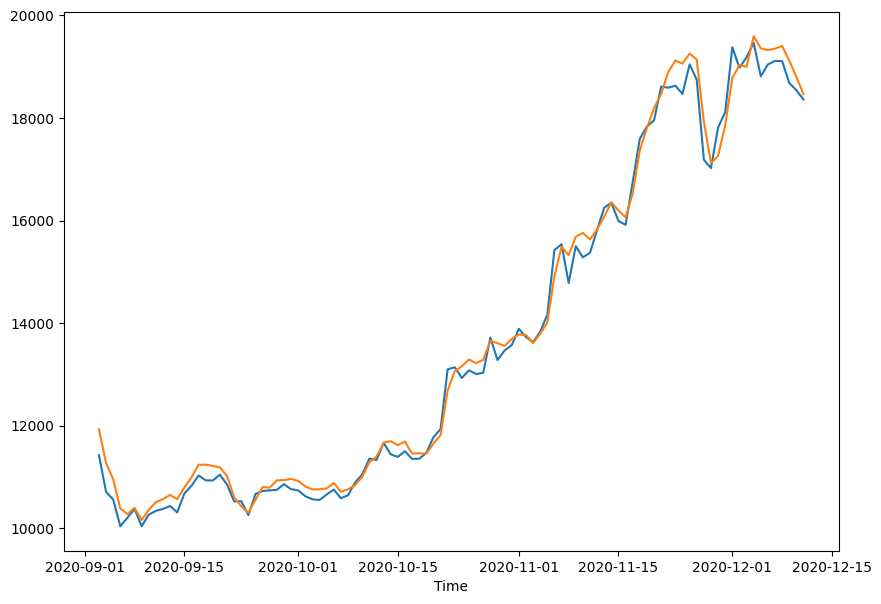

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(X_test, Y_test, start = offset, end = offset + 100)
plot_time_series(X_test, model_3_preds[:,0], start = offset, end = offset + 100)

<Axes: >

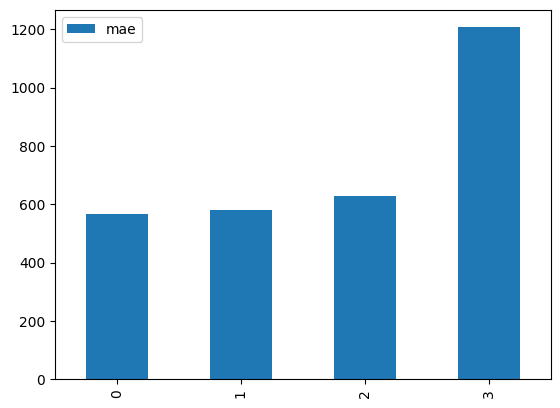

In [ ]:
pd.DataFrame({"mae":[
    base_results['MAE'].to_numpy()[0],
    model_1_results['MAE'].to_numpy()[0],
    model_2_results['MAE'].to_numpy()[0],
    model_3_results['MAE'].to_numpy()[0]
]}).plot.bar()

#### results : horizon = 1, window_size = 7 is best

#Model 4: Conv1D model

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_window, full_labels = make_window(df['Price'].to_numpy(), WINDOW_SIZE, HORIZON)
len(full_window), len(full_labels)

(2780, 2780)

In [ ]:
X_train_full, X_test_full, Y_train_full, Y_test_full = make_train_test_split(full_window, full_labels,0.2)
len(X_train_full), len(X_test_full), len(Y_train_full), len(Y_test_full)

(2224, 556, 2224, 556)

In [ ]:
X_train_full.shape, X_test_full.shape, Y_train_full.shape, Y_test_full.shape

((2224, 7), (556, 7), (2224, 1), (556, 1))

In [ ]:
Inputs = tf.keras.layers.Input(shape = (7,1))
x = tf.keras.layers.Conv1D(128, 2, padding = 'causal',activation = 'relu')(Inputs)
x = tf.keras.layers.Conv1D(128, 2, padding = 'causal',activation = 'relu')(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1)(x)

model_4 = tf.keras.Model(Inputs,outputs)

In [ ]:
model_4.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

In [ ]:
model_4.fit(X_train_full,
            Y_train_full,
            epochs = 100,
            batch_size = 128,
            validation_data = (X_test_full, Y_test_full),
            callbacks = [create_model_checkpoint("model_4.weights.h5")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - loss: 1783.8131 - mae: 1783.8131 - val_loss: 2419.9763 - val_mae: 2419.9763
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 321.4625 - mae: 321.4625 - val_loss: 1371.1722 - val_mae: 1371.1722
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 222.0524 - mae: 222.0524 - val_loss: 1141.9963 - val_mae: 1141.9963
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 196.2840 - mae: 196.2840 - val_loss: 1186.0348 - val_mae: 1186.0348
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 198.9538 - mae: 198.9538 - val_loss: 1144.7268 - val_mae: 1144.7268
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 201.8756 - mae: 201.8756 - val_loss: 1133.7351 - val_mae: 1133.7351
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 204.2268 - mae: 204.2268 - val_loss: 1341.9106 - val_mae: 1341.9106
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 209.9102 - mae: 209.9102 - val_loss: 1154.8672 -

In [ ]:
model_4.load_weights("/content/model_experiments/model_4.weights.h5")

In [ ]:
model_4.evaluate(X_test_full, Y_test_full)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 360.8883 - mae: 360.8883


[715.7037963867188, 715.7037963867188]

In [ ]:
model_4_preds = model_4.predict(X_test_full)
model_4_results = evaluate_preds(Y_test_full, model_4_preds)
model_4_results

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,MAE,MSE,RMSE,MASE,MAPE
0,715.703735,1710682.5,1307.930542,1.257293,3.244192


In [ ]:
model_4_preds.shape

(556, 1)

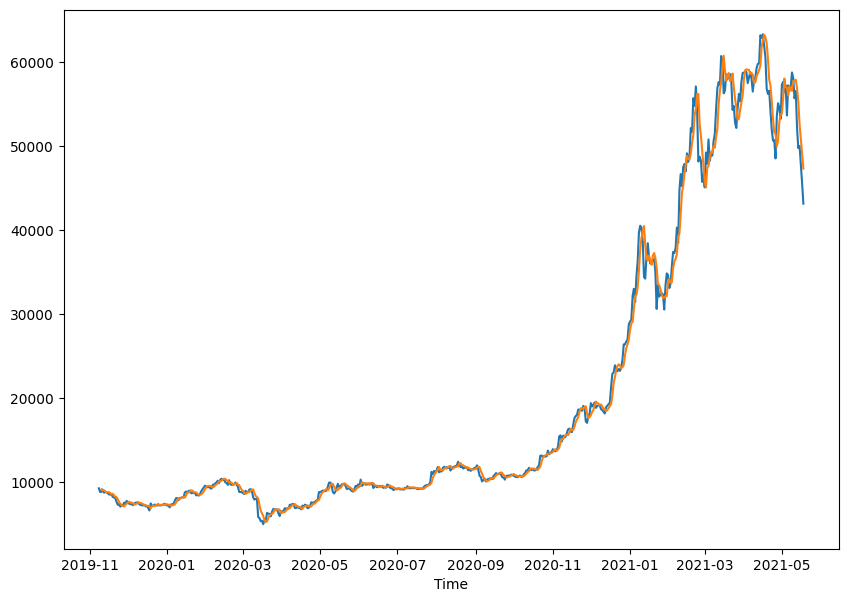

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(X_test, Y_test)
plot_time_series(X_test[2:], tf.squeeze(model_4_preds))

# Model 5: LSTM

In [ ]:
Inputs = tf.keras.layers.Input(shape = (7,1))
x = tf.keras.layers.LSTM(128,activation = 'relu', return_sequences= True)(Inputs)
x = tf.keras.layers.LSTM(128,activation = 'relu')(x)
x = tf.keras.layers.Dense(32,activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model_5 = tf.keras.Model(Inputs,outputs)

In [ ]:
model_5.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

In [ ]:
model_5.fit(X_train_full,
            Y_train_full,
            epochs = 100,
            batch_size = 128,
            validation_data = (X_test_full, Y_test_full),
            callbacks = [create_model_checkpoint("model_5.weights.h5")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 206ms/step - loss: 2283.4031 - mae: 2283.4031 - val_loss: 1317.6981 - val_mae: 1317.6981
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 274.0146 - mae: 274.0146 - val_loss: 1496.4930 - val_mae: 1496.4930
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 265.1735 - mae: 265.1735 - val_loss: 1204.2161 - val_mae: 1204.2161
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 198.3664 - mae: 198.3664 - val_loss: 1273.2792 - val_mae: 1273.2792
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 212.1146 - mae: 212.1146 - val_loss: 1276.6533 - val_mae: 1276.6533
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 195.2871 - mae: 195.2871 - val_loss: 1187.0695 - val_mae: 1187.0695
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 194.6445 - mae: 194.6445 - val_loss: 920.1199 - val_mae: 920.1199
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 171.5358 - mae: 171.5358 - val_loss: 1110.5958 - v

In [ ]:
model_5.load_weights("/content/model_experiments/model_5.weights.h5")

In [ ]:
model_5.evaluate(X_test_full, Y_test_full)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 322.5652 - mae: 322.5652


[643.2289428710938, 643.2289428710938]

In [ ]:
model_5_preds = model_5.predict(X_test_full)
model_5_results = evaluate_preds(Y_test_full, model_5_preds)
model_5_results

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


,MAE,MSE,RMSE,MASE,MAPE
0,643.229004,1436253.0,1198.437744,1.129975,2.896291


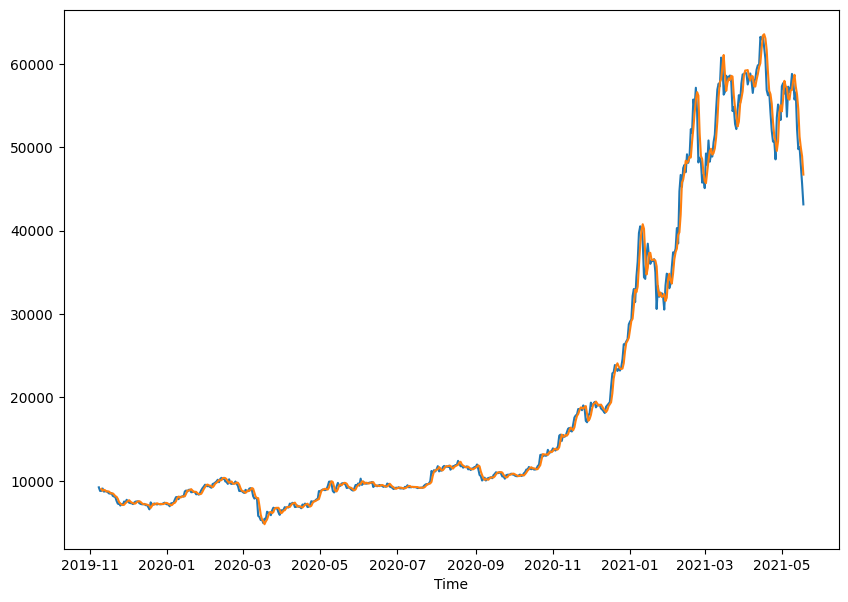

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(X_test, Y_test)
plot_time_series(X_test[2:], tf.squeeze(model_5_preds))

# Adding new rewards

In [ ]:
import numpy as np
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
df['block_reward'] = 50.0
df

,Price,block_reward
Date,,
2013-10-01,123.654990,50.0
2013-10-02,125.455000,50.0
2013-10-03,108.584830,50.0
2013-10-04,118.674660,50.0
2013-10-05,121.338660,50.0
...,...,...
2021-05-14,49764.132082,50.0
2021-05-15,50032.693137,50.0
2021-05-16,47885.625255,50.0


In [ ]:
df.loc[(df.index >= block_reward_2_datetime) & (df.index < block_reward_3_datetime), 'block_reward'] = block_reward_2
df.loc[(df.index >= block_reward_3_datetime) & (df.index < block_reward_4_datetime), 'block_reward'] = block_reward_3
df.loc[(df.index >= block_reward_4_datetime), 'block_reward'] = block_reward_4
df

,Price,block_reward
Date,,
2013-10-01,123.654990,25.00
2013-10-02,125.455000,25.00
2013-10-03,108.584830,25.00
2013-10-04,118.674660,25.00
2013-10-05,121.338660,25.00
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


In [ ]:
import sklearn

scaled_price_block_df = pd.DataFrame(sklearn.preprocessing.minmax_scale(df[['block_reward', 'Price']]),
                                     columns = df.columns,
                                     index = df.index)

scaled_price_block_df

,Price,block_reward
Date,,
2013-10-01,1.0,0.000238
2013-10-02,1.0,0.000267
2013-10-03,1.0,0.000000
2013-10-04,1.0,0.000160
2013-10-05,1.0,0.000202
...,...,...
2021-05-14,0.0,0.785214
2021-05-15,0.0,0.789461
2021-05-16,0.0,0.755509


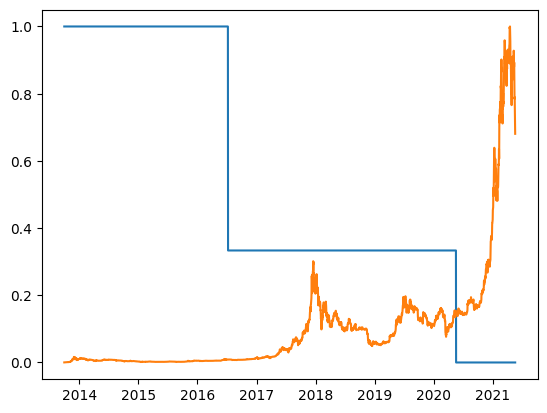

In [ ]:
plt.plot(scaled_price_block_df)

# Making a window dataset with pandas

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
df_windowed = df.copy()

for i in range(WINDOW_SIZE):
  df_windowed[f"Price+{i+1}"] =df_windowed['Price'].shift(periods = i+1)
df_windowed

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.654990,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25.00,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25.00,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25.00,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25.00,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
X = df_windowed.dropna().drop("Price", axis = 1).astype(np.float32)
Y = df_windowed.dropna()['Price'].astype(np.float32)
X,Y

(            block_reward       Price+1       Price+2       Price+3  \
 Date                                                                 
 2013-10-08         25.00    121.794998    120.655327    121.338661   
 2013-10-09         25.00    123.032997    121.794998    120.655327   
 2013-10-10         25.00    124.049004    123.032997    121.794998   
 2013-10-11         25.00    125.961159    124.049004    123.032997   
 2013-10-12         25.00    125.279663    125.961159    124.049004   
 ...                  ...           ...           ...           ...   
 2021-05-14          6.25  52147.820312  56573.554688  55715.546875   
 2021-05-15          6.25  49764.132812  52147.820312  56573.554688   
 2021-05-16          6.25  50032.691406  49764.132812  52147.820312   
 2021-05-17          6.25  47885.625000  50032.691406  49764.132812   
 2021-05-18          6.25  45604.617188  47885.625000  50032.691406   
 
                  Price+4       Price+5       Price+6       Price+7  
 Date

In [ ]:
split_size = int(len(X)*0.8)

X_train, X_test , Y_train, Y_test = X[:split_size], X[split_size:], Y[:split_size], Y[split_size:]
len(X_train), len(X_test), len(Y_train), len(Y_test)

(2224, 556, 2224, 556)

In [ ]:
Inputs = tf.keras.layers.Input(shape =(8,))
x = tf.keras.layers.Dense(128, activation = 'relu')(Inputs)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model_6 = tf.keras.Model(Inputs, outputs)

In [ ]:
model_6.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam())

In [ ]:
model_6.fit(X_train,
            Y_train,
            epochs = 100,
            batch_size = 128,
            validation_data =(X_test,Y_test),
            callbacks =[create_model_checkpoint("model_6.weights.h5")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 2147.0283 - val_loss: 2786.5193
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 331.0816 - val_loss: 1220.6418
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 232.9608 - val_loss: 1109.0220
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 208.7684 - val_loss: 1060.3954
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 182.5531 - val_loss: 1006.5569
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 184.9214 - val_loss: 980.6329
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 172.1457 - val_loss: 876.3929
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 148.6454 - val_loss: 869.4819
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 143.8672 - val_loss: 896.1532
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 143.2101 - val_loss: 750.7381
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 140.2457 - val_loss: 738.7537
Epoch 12/100

In [ ]:
model_6.load_weights("/content/model_experiments/model_6.weights.h5")
model_6.evaluate(X_test,Y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 281.9700


563.9763793945312

In [ ]:
evaluate_preds(Y_test, model_6.predict(X_test))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,MAE,MSE,RMSE,MASE,MAPE
0,563.976379,1162053.5,1077.98584,30.135929,2.522708


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


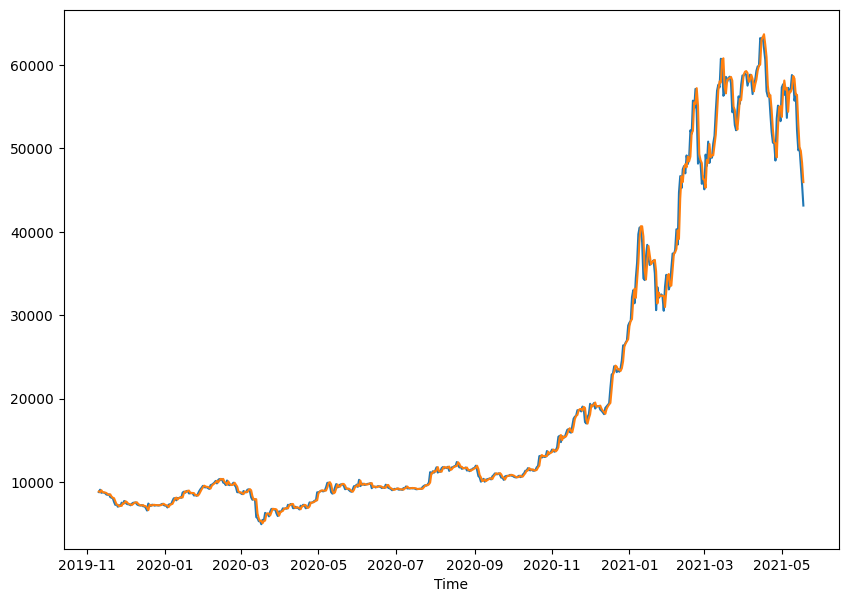

In [ ]:
plt.figure(figsize =(10,7))
plot_time_series(df.index[2231:], Y_test)
plot_time_series(df.index[2231:], model_6.predict(X_test))

# Model 7: N-BEATS algorithm

## Building N-BEATS block layer

In [ ]:
class NBEATSBLOCK(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden =[tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size,activation='linear', name = 'theta')


  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    # output backcast and forecast
    backcast, forecast = theta[:,:self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

### testing NBEATS blocks

In [ ]:
WINDOW_SIZE =7
HORIZON =1

In [ ]:
dummy_layer = NBEATSBLOCK(WINDOW_SIZE, WINDOW_SIZE+HORIZON, HORIZON, 128, 4)

In [ ]:
dummy_input = tf.expand_dims(tf.range(WINDOW_SIZE)+1 , axis =0)
dummy_input

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_layer(dummy_input)

In [ ]:
backcast,forecast

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[ 0.3022676 ,  0.8325035 ,  0.31315708,  0.4165736 , -0.47719228,
         -0.87756467, -0.16021448]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.30196318]], dtype=float32)>)

## preparing data for NBEATS algo

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
df_uni = df.drop('block_reward', axis =1)
df_uni

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [ ]:
for i in range(WINDOW_SIZE):
  df_uni[f"Price+{i+1}"] = df_uni["Price"].shift(periods= i+1)
df_uni = df_uni.dropna()
df_uni

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990
2013-10-09,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000
2013-10-10,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830
2013-10-11,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660
2013-10-12,125.927500,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
X = df_uni.drop('Price', axis = 1)
Y = df_uni['Price']

split_size = int(len(X)*0.8)

X_train, X_test, Y_train, Y_test = X[:split_size], X[split_size:], Y[:split_size], Y[split_size:]
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2224, 7), (556, 7), (2224,), (556,))

In [ ]:
X_train_dataset = tf.data.Dataset.from_tensor_slices(X_train)
X_test_dataset = tf.data.Dataset.from_tensor_slices(X_test)
Y_train_dataset = tf.data.Dataset.from_tensor_slices(Y_train)
Y_test_dataset = tf.data.Dataset.from_tensor_slices(Y_test)

train_dataset = tf.data.Dataset.zip((X_train_dataset, Y_train_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.zip((X_test_dataset, Y_test_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)

## Setting up hyperparameters

In [ ]:
N_EPOCHS = 1000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = HORIZON+INPUT_SIZE

INPUT_SIZE, THETA_SIZE

(7, 8)

#Making residual connections

In [ ]:
nbeats_block_layer =NBEATSBLOCK(INPUT_SIZE,
                                THETA_SIZE,
                                HORIZON,
                                N_NEURONS,
                                N_LAYERS)

stack_inputs = tf.keras.layers.Input(shape = (INPUT_SIZE,))

residuals, forecast = nbeats_block_layer(stack_inputs)

for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBEATSBLOCK(INPUT_SIZE,
                                THETA_SIZE,
                                HORIZON,
                                N_NEURONS,
                                N_LAYERS)(residuals)

  residuals = tf.keras.layers.subtract([residuals,backcast])
  forecast = tf.keras.layers.add([forecast, block_forecast])

model_7 = tf.keras.Model(stack_inputs, outputs = forecast)

In [ ]:
model_7.compile(loss = tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam())

In [ ]:
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            callbacks =[create_model_checkpoint("model_7.weights.h5"),
                        tf.keras.callbacks.EarlyStopping(monitor ='val_loss',
                                                         patience = 50,
                                                         restore_best_weights = True),
                        tf.keras.callbacks.ReduceLROnPlateau(patience = 40)
                        ])

Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 100s 8s/step - loss: 2384.9709 - val_loss: 342936.7500 - learning_rate: 0.0010
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - loss: 10555.3350 - val_loss: 2536.6289 - learning_rate: 0.0010
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 531.6542 - val_loss: 4958.2500 - learning_rate: 0.0010
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 370.8816 - val_loss: 2565.2761 - learning_rate: 0.0010
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - loss: 478.7263 - val_loss: 1280.8651 - learning_rate: 0.0010
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 487.0797 - val_loss: 14946.0059 - learning_rate: 0.0010
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 971ms/step - loss: 2311.0439 - val_loss: 1198.0909 - learning_rate: 0.0010
Epoch 8/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 256.1389 - val_loss: 7413.5161 - learning_rate: 0.0010
Epoch 9/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1305.1652 - val_loss: 628

KeyboardInterrupt: 

In [ ]:
model_7.load_weights("/content/model_experiments/model_7.weights.h5")
model_7.evaluate(test_dataset)

ValueError: A total of 72 objects could not be loaded. Example error message for object <Dense name=dense_67, built=True>:

Layer 'dense_67' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense_67, built=True>, <Dense name=theta, built=True>, <Dense name=dense_68, built=True>, <Dense name=dense_69, built=True>, <Dense name=dense_70, built=True>, <Dense name=dense_71, built=True>, <Dense name=theta, built=True>, <Dense name=dense_72, built=True>, <Dense name=dense_73, built=True>, <Dense name=dense_74, built=True>, <Dense name=dense_75, built=True>, <Dense name=theta, built=True>, <Dense name=dense_76, built=True>, <Dense name=dense_77, built=True>, <Dense name=dense_78, built=True>, <Dense name=dense_79, built=True>, <Dense name=theta, built=True>, <Dense name=dense_80, built=True>, <Dense name=dense_81, built=True>, <Dense name=dense_82, built=True>, <Dense name=dense_83, built=True>, <Dense name=theta, built=True>, <Dense name=dense_84, built=True>, <Dense name=dense_85, built=True>, <Dense name=dense_86, built=True>, <Dense name=dense_87, built=True>, <Dense name=theta, built=True>, <Dense name=dense_88, built=True>, <Dense name=dense_89, built=True>, <Dense name=dense_90, built=True>, <Dense name=dense_91, built=True>, <Dense name=theta, built=True>, <Dense name=dense_92, built=True>, <Dense name=dense_93, built=True>, <Dense name=dense_94, built=True>, <Dense name=dense_95, built=True>, <Dense name=theta, built=True>, <Dense name=dense_96, built=True>, <Dense name=dense_97, built=True>, <Dense name=dense_98, built=True>, <Dense name=dense_99, built=True>, <Dense name=theta, built=True>, <Dense name=dense_100, built=True>, <Dense name=dense_101, built=True>, <Dense name=dense_102, built=True>, <Dense name=dense_103, built=True>, <Dense name=theta, built=True>, <Dense name=dense_104, built=True>, <Dense name=dense_105, built=True>, <Dense name=dense_106, built=True>, <Dense name=dense_107, built=True>, <Dense name=theta, built=True>, <Dense name=dense_108, built=True>, <Dense name=dense_109, built=True>, <Dense name=dense_110, built=True>, <Dense name=dense_111, built=True>, <Dense name=theta, built=True>, <Dense name=dense_112, built=True>, <Dense name=dense_113, built=True>, <Dense name=dense_114, built=True>, <Dense name=dense_115, built=True>, <Dense name=theta, built=True>, <Dense name=dense_116, built=True>, <Dense name=dense_117, built=True>, <Dense name=dense_118, built=True>, <Dense name=dense_119, built=True>, <Dense name=theta, built=True>, <Dense name=dense_120, built=True>, <Dense name=dense_121, built=True>, <Dense name=dense_122, built=True>, <Dense name=dense_123, built=True>, <Dense name=theta, built=True>]

In [ ]:
model_7_preds = model_7.predict(test_dataset)
model_7_results = evaluate_preds(Y_test, model_7_preds)
model_7_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,MAE,MSE,RMSE,MASE,MAPE
0,579.308899,1178382.625,1085.533325,30.093231,2.670853


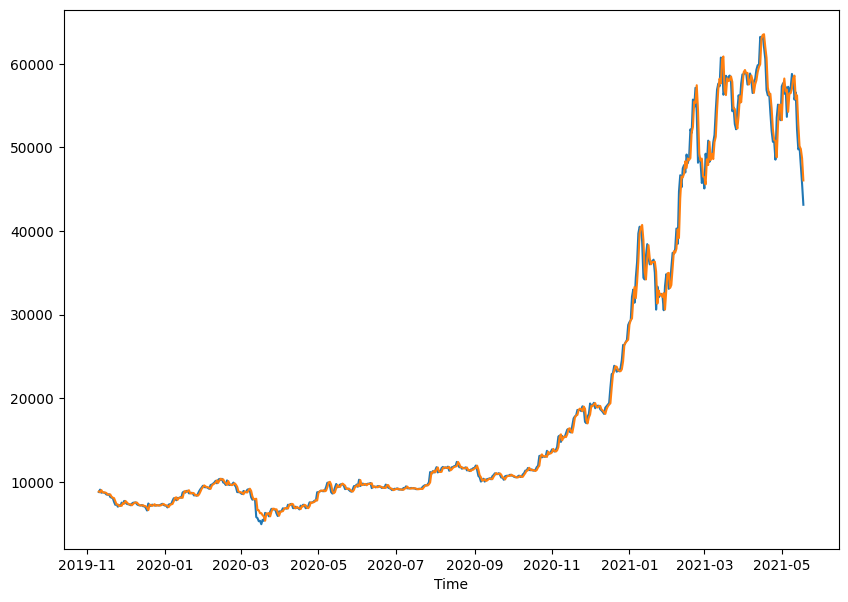

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(df.index[2231:], Y_test)
plot_time_series(df.index[2231:], model_7_preds)

In [ ]:
tf.keras.utils.plot_model(model_7, show_shapes = True)

# Model 8 : Creating an ensemble model

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        tf.keras.layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [ ]:
model_8 = get_ensemble_models(num_iter = 5)

Optimizing model by reducing: mae for 100 epochs, model number: 0
Optimizing model by reducing: mse for 100 epochs, model number: 0
Optimizing model by reducing: mape for 100 epochs, model number: 0
Optimizing model by reducing: mae for 100 epochs, model number: 1
Optimizing model by reducing: mse for 100 epochs, model number: 1
Optimizing model by reducing: mape for 100 epochs, model number: 1
Optimizing model by reducing: mae for 100 epochs, model number: 2
Optimizing model by reducing: mse for 100 epochs, model number: 2
Optimizing model by reducing: mape for 100 epochs, model number: 2
Optimizing model by reducing: mae for 100 epochs, model number: 3
Optimizing model by reducing: mse for 100 epochs, model number: 3
Optimizing model by reducing: mape for 100 epochs, model number: 3
Optimizing model by reducing: mae for 100 epochs, model number: 4
Optimizing model by reducing: mse for 100 epochs, model number: 4
Optimizing model by reducing: mape for 100 epochs, model number: 4


In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.squeeze(tf.constant(ensemble_preds))

In [ ]:
model_8_preds = make_ensemble_preds(model_8, test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


## Evaluate ensemble preds

In [ ]:
model_8_preds.shape

TensorShape([15, 556])

In [ ]:
model_8_results = evaluate_preds(df['Price'].to_numpy()[-556:],
                                 model_8_preds)

In [ ]:
model_8_results

,MAE,MSE,RMSE,MASE,MAPE
0,646.385498,1441442.625,1200.600952,1.13552,2.950855


In [ ]:
def get_upper_lower_boundaries(preds):
  std = tf.math.reduce_std(preds, axis =0)
  interval = 1.96*std

  pred_means = tf.reduce_mean(preds, axis =0)
  lower, upper = pred_means - interval, pred_means +interval

  return lower, upper

In [ ]:
lower, upper = get_upper_lower_boundaries(model_8_preds)

# plotting prediction intervals

In [ ]:
import numpy as np

In [ ]:
ensemble_median.shape

(556,)

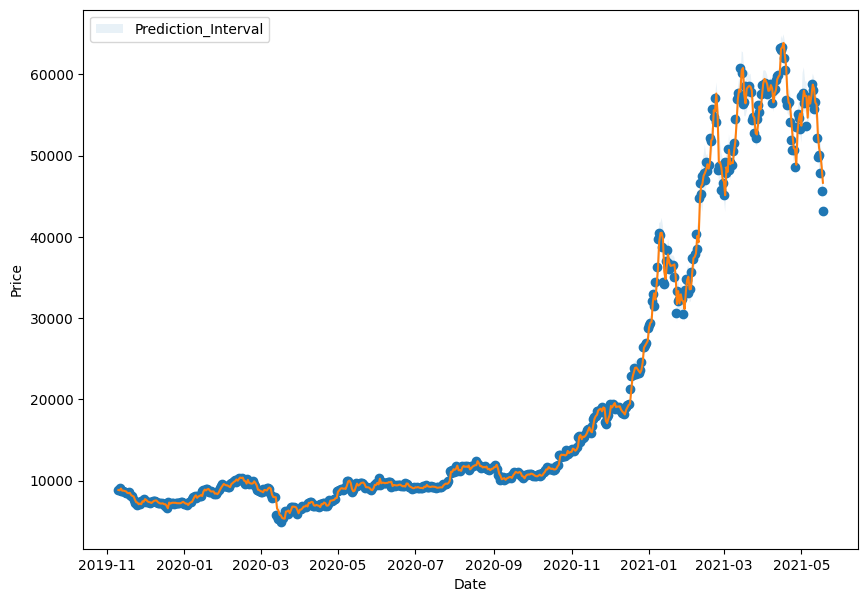

In [ ]:
ensemble_median = np.median(model_8_preds, axis =0)

offset = 556
plt.figure(figsize=(10,7))
plt.plot(df.index[-offset:], df['Price'].to_numpy()[-offset:], "o")
plt.plot(df.index[-offset:], ensemble_median, "-")
plt.xlabel("Date")
plt.ylabel("Price")

# Remove the extra parentheses around lower and upper
plt.fill_between(df.index[-offset:],
                 lower,  # Not (lower)
                 upper,  # Not (upper)
                 alpha=0.1,  # Added transparency
                 label="Prediction_Interval")

plt.legend()


# Model 9 : Training on full historical data

In [ ]:
X_all = df_uni.drop('Price', axis = 1).to_numpy()
Y_all = df_uni['Price'].to_numpy()

X_all.shape, Y_all.shape

((2780, 7), (2780,))

In [ ]:
X_all_dataset = tf.data.Dataset.from_tensor_slices(X_all)
Y_all_dataset = tf.data.Dataset.from_tensor_slices(Y_all)
All_dataset = tf.data.Dataset.zip((X_all_dataset, Y_all_dataset)).batch(128).prefetch(tf.data.AUTOTUNE)

In [ ]:
Inputs = tf.keras.layers.Input(shape =(WINDOW_SIZE,))
x = tf.keras.layers.Dense(128, activation = 'relu')(Inputs)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model_9 = tf.keras.Model(Inputs, outputs)

In [ ]:
model_9.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

In [ ]:
model_9.fit(All_dataset,
            epochs = 100)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 240.2564 - mae: 240.2564
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 488.5460 - mae: 488.5460 
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 309.7605 - mae: 309.7605
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 202.4052 - mae: 202.4052
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 366.7809 - mae: 366.7809
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 262.6426 - mae: 262.6426
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210.6411 - mae: 210.6411
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 437.6350 - mae: 437.6350
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 181.6357 - mae: 181.6357
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 389.4922 - mae: 389.4922
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 385.3954 - mae: 385.3954
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102.4653 - m

## Make predictions into the future

In [ ]:
INTO_FUTURE = 14

In [ ]:
import numpy as np
def make_future_forecasts(values, model, into_future, window_size = WINDOW_SIZE) -> list:
  """
  Make future forecasts
  """

  future_forecasts = []
  last_window = values[-window_size:]

  for _ in range(INTO_FUTURE):
    future_pred = model.predict(tf.expand_dims(last_window, axis = 0))
    future_forecasts.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window,future_pred)[-window_size:]

  return future_forecasts


In [ ]:
results =make_future_forecasts(Y_all, model_9, INTO_FUTURE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
results = np.insert(results, 0, Y_all[-1])

In [ ]:
def get_future_dates(start_date, into_future, offset =1):
  """
  returns an array of datetime values
  """

  start_date = start_date +np.timedelta64(offset, 'D')
  future_dates = [start_date + np.timedelta64(i, 'D') for i in range(into_future)]

  return np.array(future_dates)

In [ ]:
last_timestep = df_uni.index[-1]
future_dates = get_future_dates(last_timestep, INTO_FUTURE)
future_dates = np.insert(future_dates, 0, last_timestep)
future_dates

array([Timestamp('2021-05-18 00:00:00'), Timestamp('2021-05-19 00:00:00'),
       Timestamp('2021-05-20 00:00:00'), Timestamp('2021-05-21 00:00:00'),
       Timestamp('2021-05-22 00:00:00'), Timestamp('2021-05-23 00:00:00'),
       Timestamp('2021-05-24 00:00:00'), Timestamp('2021-05-25 00:00:00'),
       Timestamp('2021-05-26 00:00:00'), Timestamp('2021-05-27 00:00:00'),
       Timestamp('2021-05-28 00:00:00'), Timestamp('2021-05-29 00:00:00'),
       Timestamp('2021-05-30 00:00:00'), Timestamp('2021-05-31 00:00:00'),
       Timestamp('2021-06-01 00:00:00')], dtype=object)

In [ ]:
future_dates

array([Timestamp('2021-05-18 00:00:00'), Timestamp('2021-05-19 00:00:00'),
       Timestamp('2021-05-20 00:00:00'), Timestamp('2021-05-21 00:00:00'),
       Timestamp('2021-05-22 00:00:00'), Timestamp('2021-05-23 00:00:00'),
       Timestamp('2021-05-24 00:00:00'), Timestamp('2021-05-25 00:00:00'),
       Timestamp('2021-05-26 00:00:00'), Timestamp('2021-05-27 00:00:00'),
       Timestamp('2021-05-28 00:00:00'), Timestamp('2021-05-29 00:00:00'),
       Timestamp('2021-05-30 00:00:00'), Timestamp('2021-05-31 00:00:00'),
       Timestamp('2021-06-01 00:00:00')], dtype=object)

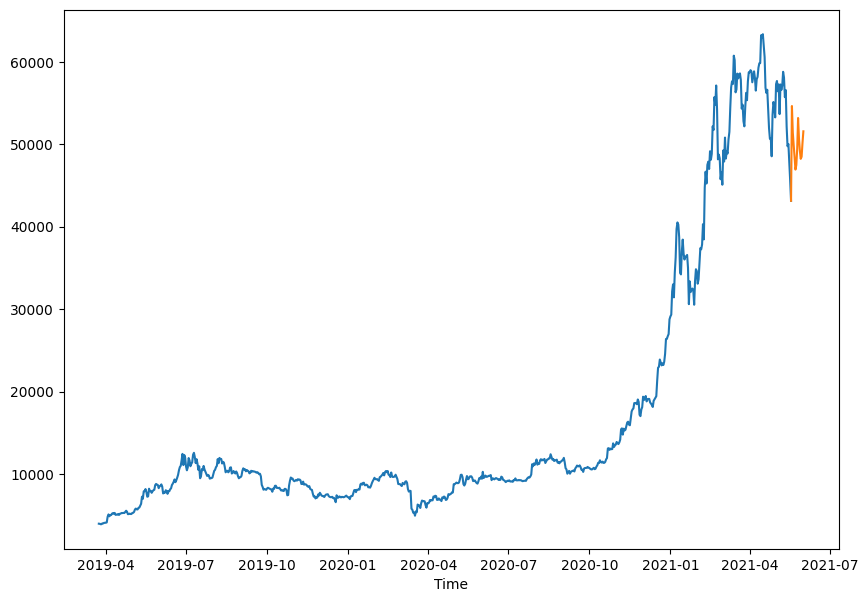

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(df.index[2000:], df['Price'][2000:])
plot_time_series(future_dates, results)

# Turkey Problem

In [ ]:
btc_price_turkey = df.copy().drop('block_reward', axis = 1)
btc_price_turkey

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [ ]:
btc_price_turkey.iloc[-1] = btc_price_turkey.iloc[-1]/100
btc_price_turkey.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,431.444713


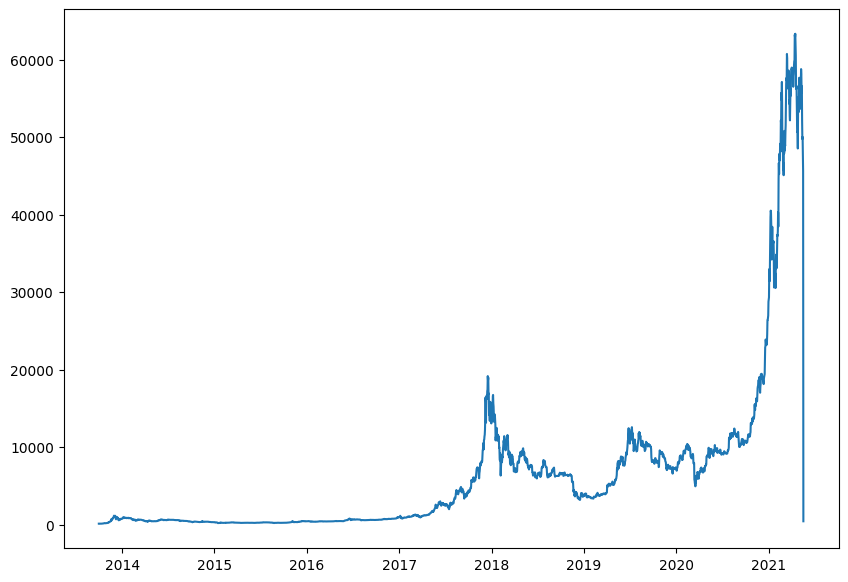

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(btc_price_turkey)

In [ ]:
for i in range(WINDOW_SIZE):
  btc_price_turkey[f"Price+{i+1}"] = btc_price_turkey["Price"].shift(periods= i+1)
btc_price_turkey = btc_price_turkey.dropna()
btc_price_turkey

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990
2013-10-09,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000
2013-10-10,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830
2013-10-11,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660
2013-10-12,125.927500,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
X= tf.constant(btc_price_turkey.drop('Price', axis = 1).to_numpy())
Y = tf.constant(btc_price_turkey['Price'].to_numpy())

In [ ]:
X_train, X_test, Y_train, Y_test = X[:split_size], X[split_size:], Y[:split_size], Y[split_size:]

In [ ]:
Inputs = tf.keras.layers.Input(shape =(WINDOW_SIZE,))
x = tf.keras.layers.Dense(128, activation = 'relu')(Inputs)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model_10 = tf.keras.Model(Inputs, outputs)

In [ ]:
model_10.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

In [ ]:
model_10.fit(X_train,
             Y_train,
             epochs = 100,
             validation_data = (X_test, Y_test))

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 989.1744 - mae: 989.1744 - val_loss: 1434.8112 - val_mae: 1434.8112
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 174.9294 - mae: 174.9294 - val_loss: 793.8736 - val_mae: 793.8736
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140.7000 - mae: 140.7000 - val_loss: 740.4940 - val_mae: 740.4940
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 119.8130 - mae: 119.8130 - val_loss: 719.5352 - val_mae: 719.5352
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129.2841 - mae: 129.2841 - val_loss: 687.0059 - val_mae: 687.0059
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 130.7339 - mae: 130.7339 - val_loss: 669.8959 - val_mae: 669.8959
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127.0174 - mae: 127.0174 - val_loss: 660.2416 - val_mae: 660.2416
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120.1124 - mae: 120.1124 - val_loss: 1234.6715 - val_mae: 1234.

In [ ]:
model_10.evaluate(X_test, Y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 299.0274 - mae: 299.0274 


[652.7283325195312, 652.7283325195312]

In [ ]:
model_10_preds = model_10.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
evaluate_preds(Y_test, model_10_preds)

,MAE,MSE,RMSE,MASE,MAPE
0,652.728333,5009530.0,2238.197998,26.576548,21.871693
